<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here
import pandas as pd

# Assuming df is your DataFrame
missing_values = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print(missing_values)

Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64


In [4]:
# Fill missing values with the mode for categorical columns
df['Employment'].fillna(df['Employment'].mode()[0], inplace=True)
df['RemoteWork'].fillna(df['RemoteWork'].mode()[0], inplace=True)

# Fill missing values with the median for ordinal columns
df['JobSat'].fillna(df['JobSat'].median(), inplace=True)

C:\Users\akash dangi\AppData\Local\Temp\ipykernel_13372\1962249716.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment'].fillna(df['Employment'].mode()[0], inplace=True)
C:\Users\akash dangi\AppData\Local\Temp\ipykernel_13372\1962249716.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [5]:
missing_values_after = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print(missing_values_after)

Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


C:\Users\akash dangi\AppData\Local\Temp\ipykernel_13372\128897842.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_jobsat = df.groupby('ExperienceRange')['JobSat'].median().reset_index()
C:\Users\akash dangi\AppData\Local\Temp\ipykernel_13372\128897842.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ExperienceRange', y='JobSat', data=median_jobsat, palette='viridis')


  ExperienceRange  JobSat
0             0-5     7.0
1            5-10     7.0
2           10-20     7.0
3             >20     7.0


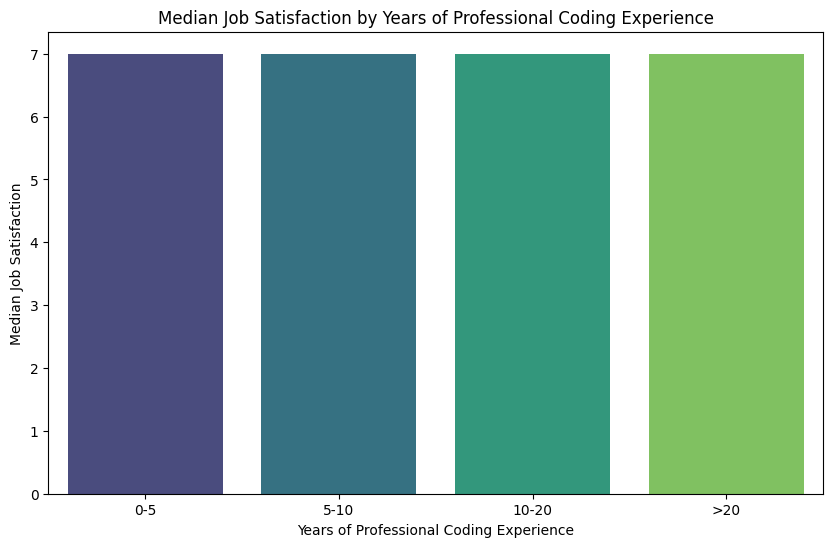

In [7]:
## Write your code here
import numpy as np
# Step 1: Convert YearsCodePro to numeric (handle non-numeric values if necessary)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Step 2: Create experience ranges
bins = [0, 5, 10, 20, np.inf]
labels = ['0-5', '5-10', '10-20', '>20']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Step 3: Calculate median JobSat for each range
median_jobsat = df.groupby('ExperienceRange')['JobSat'].median().reset_index()

# Display the results
print(median_jobsat)

# Step 4: Visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x='ExperienceRange', y='JobSat', data=median_jobsat, palette='viridis')
plt.title('Median Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction')
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


[ 7.  8.  5. 10.  6.  9.  4.  3.  2.  1.  0.]


C:\Users\akash dangi\AppData\Local\Temp\ipykernel_13372\2854553659.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='JobSat', data=df, palette='viridis', order=df['JobSat'].value_counts().index)


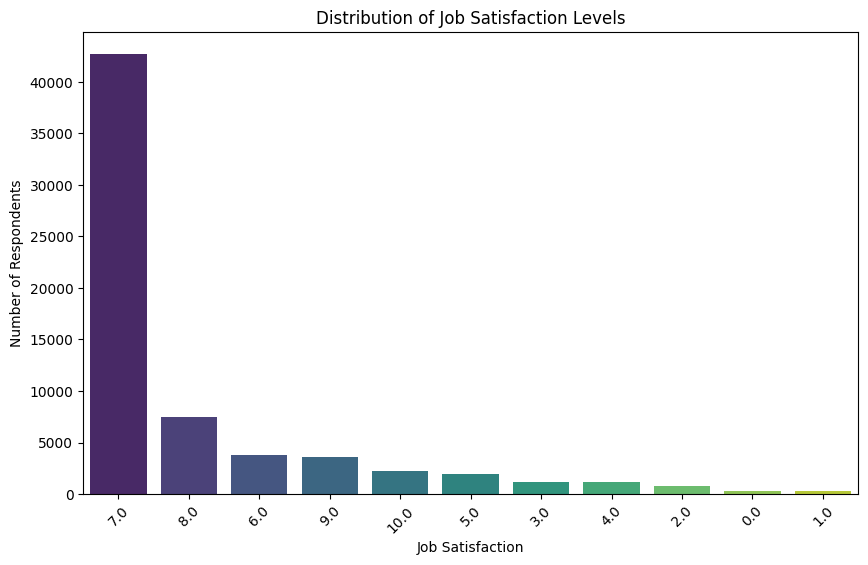

In [8]:
## Write your code here
# Step 1: Check the unique values in JobSat
print(df['JobSat'].unique())

# Step 2: Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='JobSat', data=df, palette='viridis', order=df['JobSat'].value_counts().index)
plt.title('Distribution of Job Satisfaction Levels')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


In [10]:
## Write your code here

# Step 1: Check unique values in RemoteWork and Employment
print("Unique RemoteWork values:", df['RemoteWork'].unique())
print("Unique Employment values:", df['Employment'].unique())



Unique RemoteWork values: ['Remote' 'Hybrid (some remote, some in-person)' 'In-person']
Unique Employment values: ['Employed, full-time' 'Student, full-time'
 'Student, full-time;Not employed, but looking for work'
 'Independent contractor, freelancer, or self-employed'
 'Not employed, and not looking for work'
 'Employed, full-time;Student, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Student, full-time' 'Employed, part-time'
 'Student, full-time;Employed, part-time'
 'Student, part-time;Employed, part-time' 'I prefer not to say'
 'Not employed, but looking for work' 'Student, part-time'
 'Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time'
 'Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Independent contractor, freelancer, or self-employed

C:\Users\akash dangi\AppData\Local\Temp\ipykernel_13372\3315393590.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RemoteWork', data=df, palette='viridis', order=df['RemoteWork'].value_counts().index)


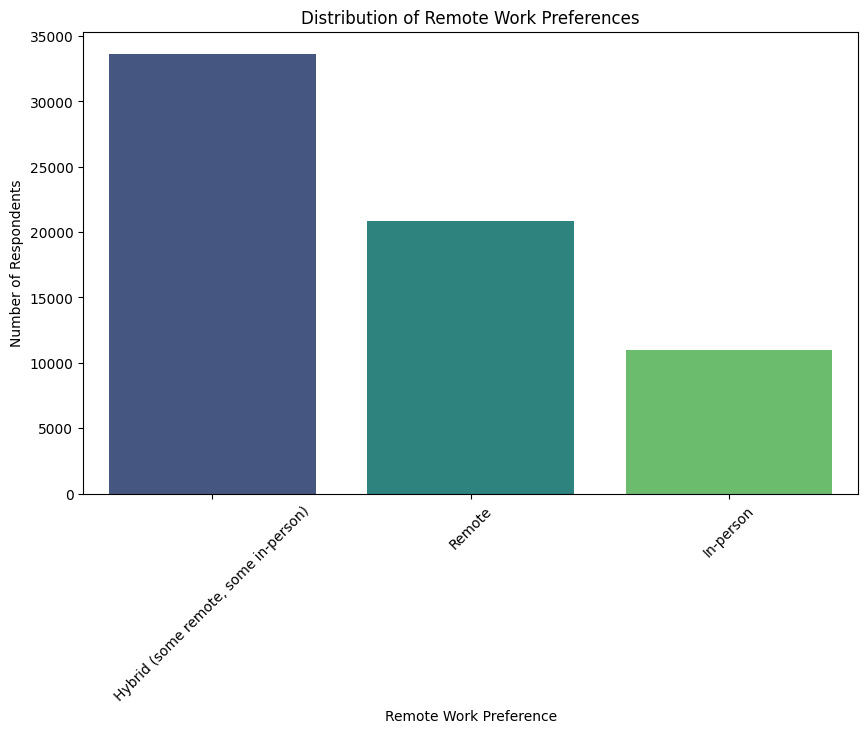

In [11]:
# Step 2: Count plot for RemoteWork distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='RemoteWork', data=df, palette='viridis', order=df['RemoteWork'].value_counts().index)
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()



In [12]:
# Step 3: Cross-tabulate RemoteWork by Employment
remote_by_employment = pd.crosstab(df['Employment'], df['RemoteWork'], normalize='index') * 100
print("Remote Work Preferences by Employment Type (%):")
print(remote_by_employment)



Remote Work Preferences by Employment Type (%):
RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                            44.302144   
Employed, full-time;Employed, part-time                                        40.094340   
Employed, full-time;Independent contractor, fre...                             37.391060   
Employed, full-time;Independent contractor, fre...                             43.478261   
Employed, full-time;Independent contractor, fre...                              0.000000   
...                                                                                  ...   
Student, full-time;Student, part-time;Employed,...                             57.142857   
Student, full-time;Student, part-time;Retired                                 100.000000   
Student, part-time              

Remote Work Preferences by Job Role (%):
RemoteWork                                          Hybrid (some remote, some in-person)  \
MainBranch                                                                                 
I am a developer by profession                                                 45.314398   
I am learning to code                                                          82.529032   
I am not primarily a developer, but I write cod...                             61.465213   
I code primarily as a hobby                                                    81.943611   
I used to be a developer by profession, but no ...                             63.774834   

RemoteWork                                          In-person     Remote  
MainBranch                                                                
I am a developer by profession                      17.322286  37.363316  
I am learning to code                               10.632258   6.838710  
I am not prima

<Figure size 1200x800 with 0 Axes>

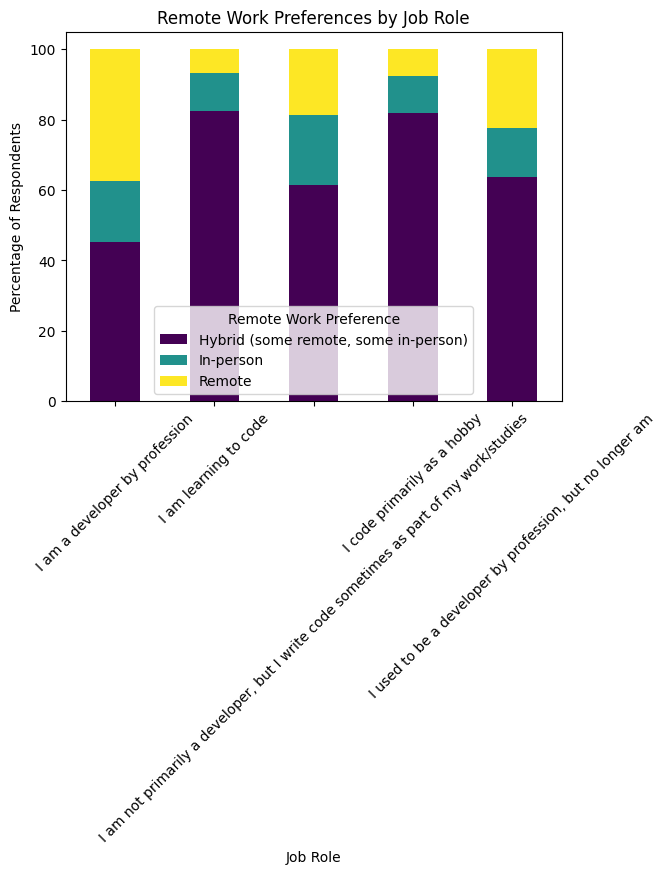

In [14]:
# Step 4: Cross-tabulate RemoteWork by Job Role
if 'MainBranch' in df.columns:
    remote_by_jobrole = pd.crosstab(df['MainBranch'], df['RemoteWork'], normalize='index') * 100
    print("Remote Work Preferences by Job Role (%):")
    print(remote_by_jobrole)

    # Visualize Remote Work Preferences by Job Role
    plt.figure(figsize=(12, 8))
    remote_by_jobrole.plot(kind='bar', stacked=True, colormap='viridis')
    plt.title('Remote Work Preferences by Job Role')
    plt.xlabel('Job Role')
    plt.ylabel('Percentage of Respondents')
    plt.xticks(rotation=45)
    plt.legend(title='Remote Work Preference')
    plt.show()
else:
    print("Column 'JobRole' not found in the DataFrame.")

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [15]:
## Write your code here
# Step 1: Filter data by country (e.g., 'United States')
country = 'India'  # Change this to the desired country
country_data = df[df['Country'] == country]


In [16]:
# Step 2: Extract programming languages from LanguageHaveWorkedWith
# Split the column by delimiter (e.g., ';') and flatten the list
languages = country_data['LanguageHaveWorkedWith'].str.split(';').explode()


In [18]:
# Step 3: Count language popularity
from collections import Counter

language_counts = Counter(languages.dropna())  # Drop NaN values and count
language_counts = pd.Series(language_counts).sort_values(ascending=False)

C:\Users\akash dangi\AppData\Local\Temp\ipykernel_13372\1450022051.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.values, y=language_counts.index, palette='viridis')


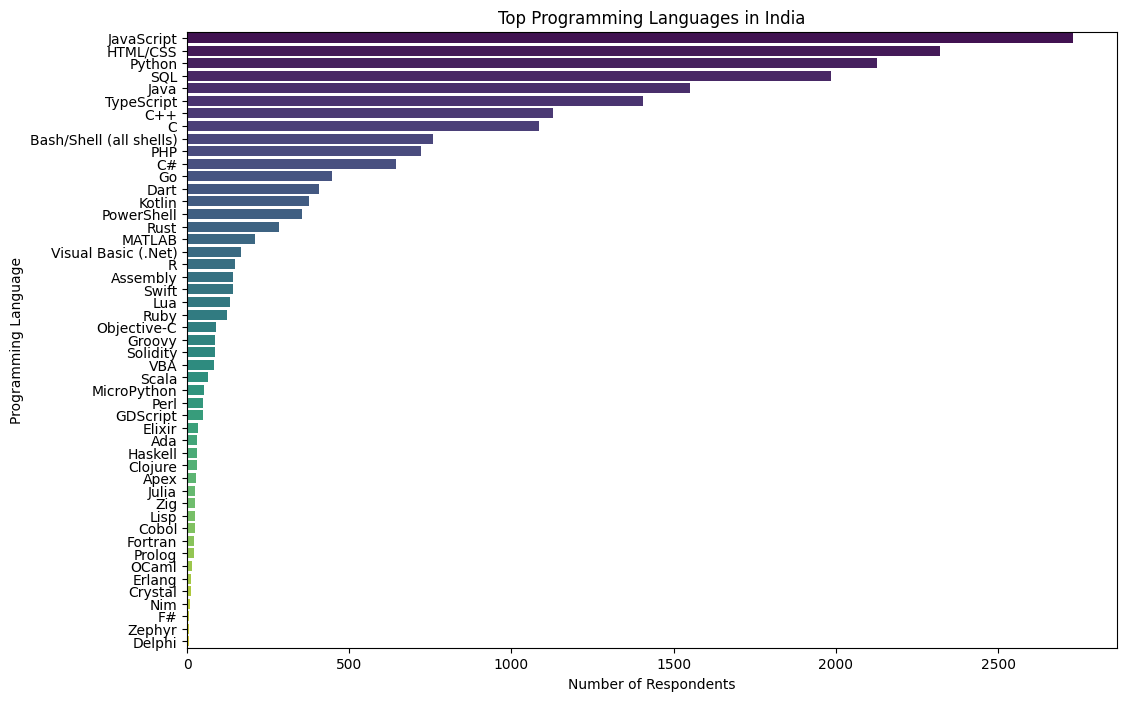

In [19]:
# Step 4: Visualize top programming languages for the country
plt.figure(figsize=(12, 8))
sns.barplot(x=language_counts.values, y=language_counts.index, palette='viridis')
plt.title(f'Top Programming Languages in {country}')
plt.xlabel('Number of Respondents')
plt.ylabel('Programming Language')
plt.show()

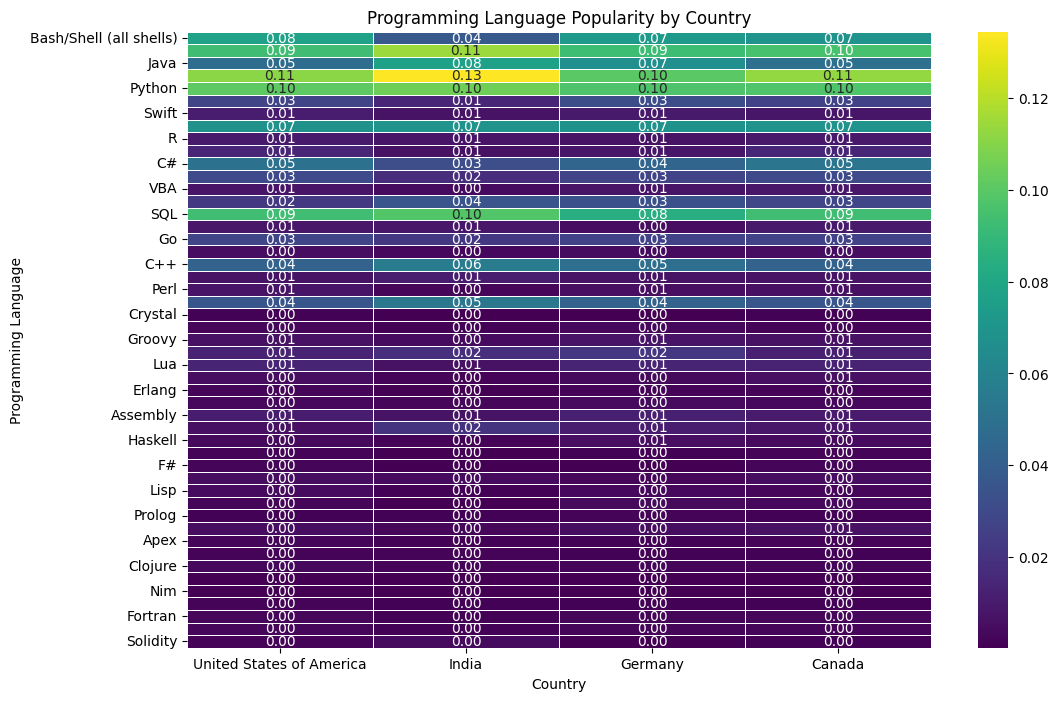

In [20]:
# Step 5: Compare language popularity across multiple countries (heatmap)
# Select a few countries for comparison
countries_to_compare = ['United States of America', 'India', 'Germany', 'Canada']
language_popularity = {}

for country in countries_to_compare:
    country_data = df[df['Country'] == country]
    languages = country_data['LanguageHaveWorkedWith'].str.split(';').explode()
    language_counts = Counter(languages.dropna())
    language_popularity[country] = language_counts

# Create a DataFrame for the heatmap
heatmap_data = pd.DataFrame(language_popularity).fillna(0)

# Normalize by the number of respondents in each country
heatmap_data = heatmap_data / heatmap_data.sum()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Programming Language Popularity by Country')
plt.xlabel('Country')
plt.ylabel('Programming Language')
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [21]:
## Write your code here
# Step 1: Prepare the data
# Convert YearsCodePro to numeric (handle non-numeric values)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Ensure JobSatPoints_1 is numeric
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')

# Drop rows with missing values in either column
df_clean = df.dropna(subset=['YearsCodePro', 'JobSatPoints_1'])

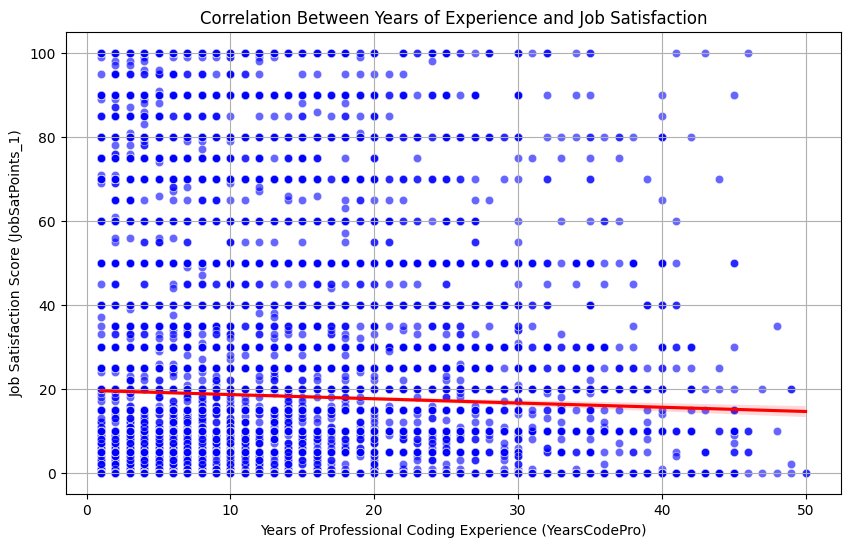

In [22]:
# Step 2: Visualize the relationship with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsCodePro', y='JobSatPoints_1', data=df_clean, alpha=0.6, color='blue')

# Add a trendline
sns.regplot(x='YearsCodePro', y='JobSatPoints_1', data=df_clean, scatter=False, color='red')

# Customize the plot
plt.title('Correlation Between Years of Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience (YearsCodePro)')
plt.ylabel('Job Satisfaction Score (JobSatPoints_1)')
plt.grid(True)
plt.show()

In [23]:
correlation = df_clean['YearsCodePro'].corr(df_clean['JobSatPoints_1'])
print(f"Pearson Correlation Coefficient: {correlation:.2f}")

Pearson Correlation Coefficient: -0.03


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [24]:
## Write your code here
# Step 1: Prepare the data
# Drop rows with missing values in EdLevel or Employment
df_clean = df.dropna(subset=['EdLevel', 'Employment'])

In [26]:
# Step 2: Cross-tabulate EdLevel and Employment
cross_tab = pd.crosstab(df_clean['EdLevel'], df_clean['Employment'], normalize='index') * 100
print("Cross-Tabulation of Educational Level and Employment Type (%):")
print(cross_tab)

Cross-Tabulation of Educational Level and Employment Type (%):
Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                           59.063023   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                  67.380322   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)               70.778428   
Primary/elementary school                                     13.961606   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                69.797980   
Secondary school (e.g. American high school, Ge...            25.202831   
Some college/university study without earning a...            46.778199   
Something else                                                40.450644   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                    

<Figure size 1200x800 with 0 Axes>

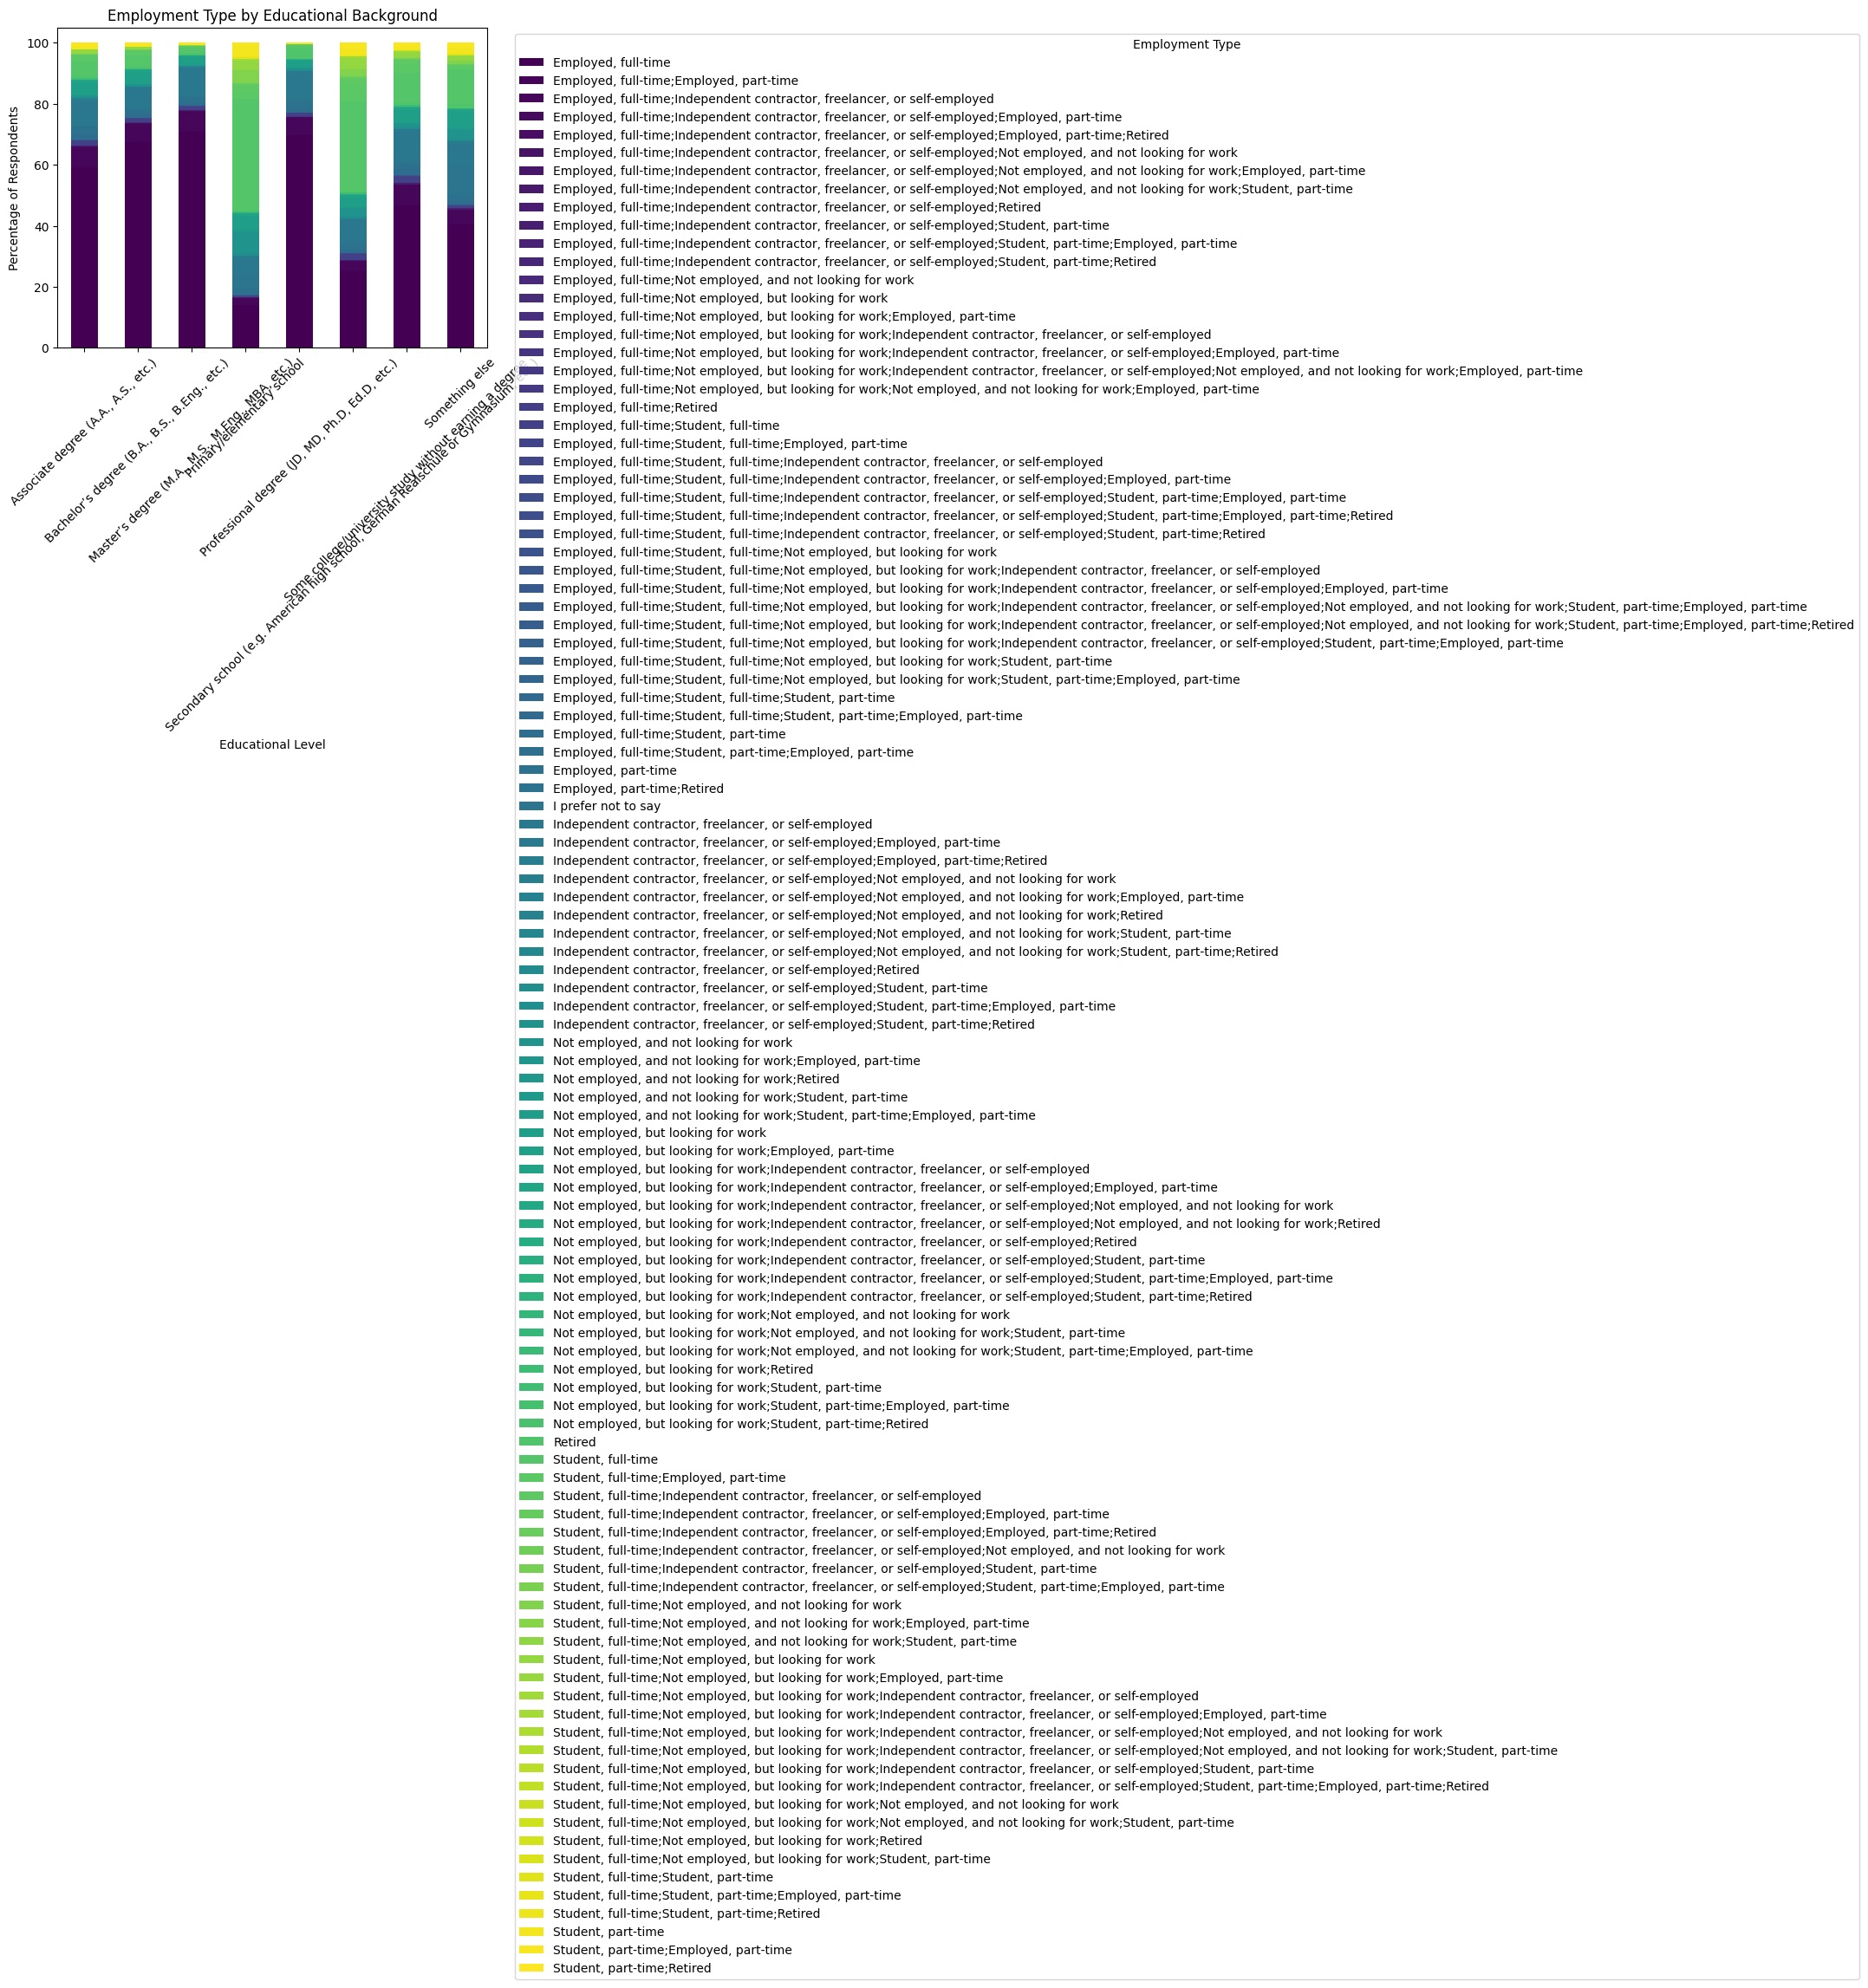

In [27]:
# Step 3: Visualize the relationship
# Stacked Bar Plot
plt.figure(figsize=(12, 8))
cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Employment Type by Educational Background')
plt.xlabel('Educational Level')
plt.ylabel('Percentage of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

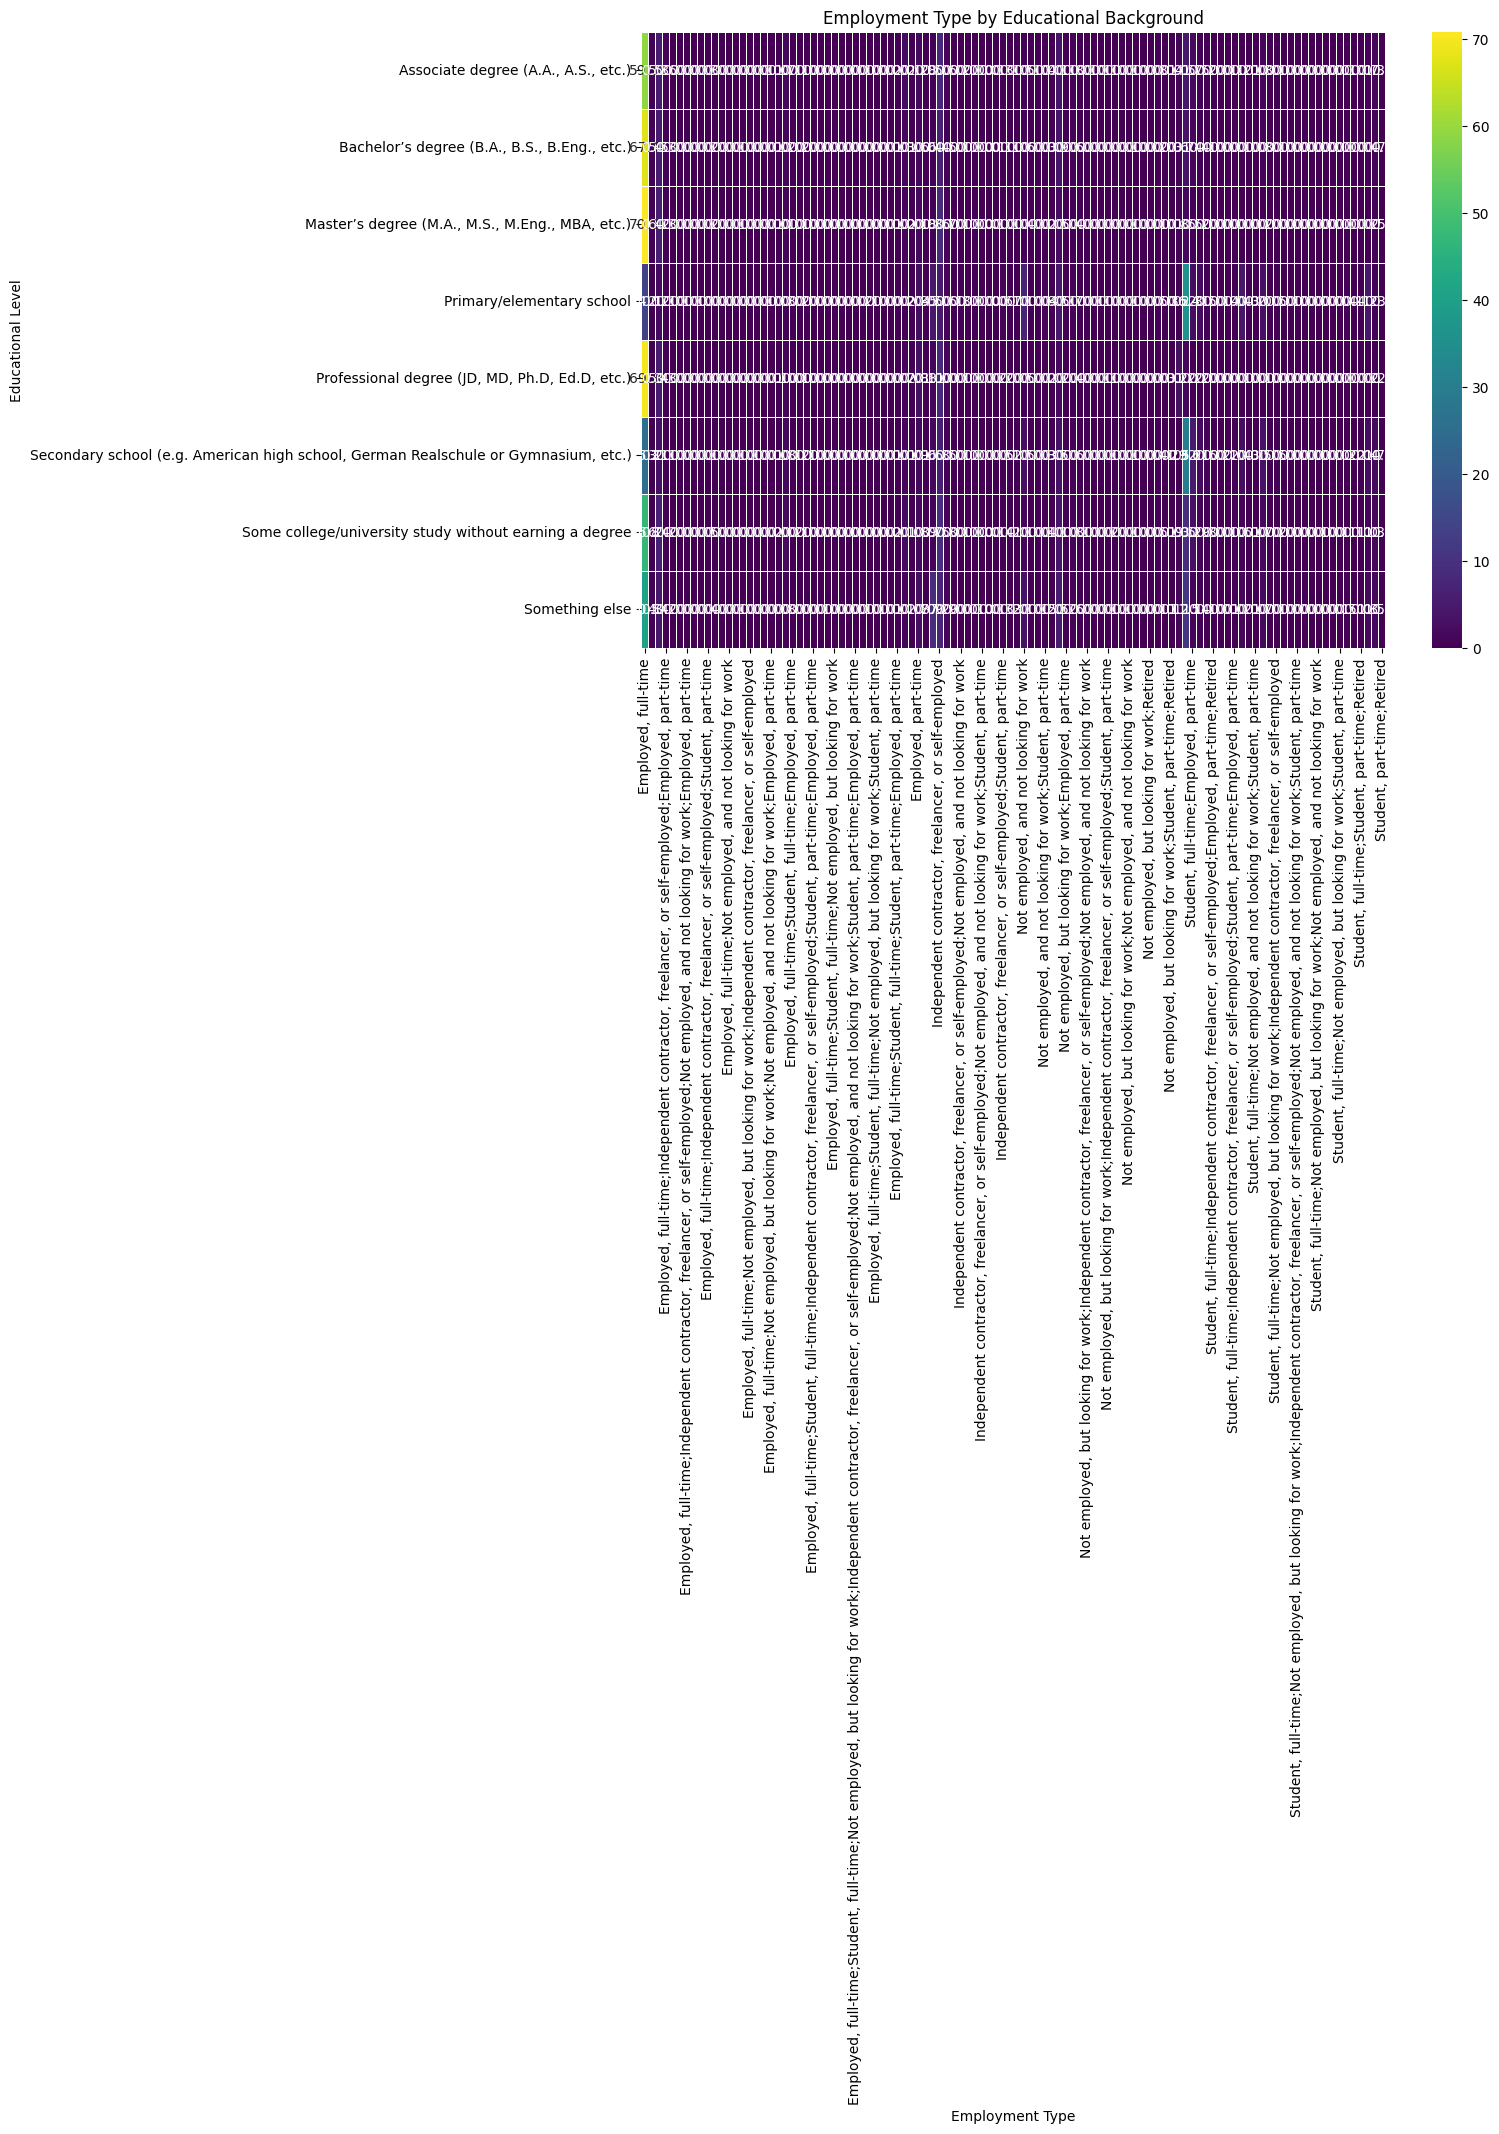

In [28]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt='.1f', cmap='viridis', linewidths=0.5)
plt.title('Employment Type by Educational Background')
plt.xlabel('Employment Type')
plt.ylabel('Educational Level')
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here

# Step 1: Save the dataset to a CSV file
df_clean.to_csv('cleaned_analyzed_dataset.csv', index=False)

# Step 2: Save the dataset to an Excel file
df_clean.to_excel('cleaned_analyzed_dataset.xlsx', index=False)



<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
